# Coursework I

This notebook describes the first part of the ML coursework.  This part builds on work that you have already done during the labs.  The purpose of this coursework, along with the previous lab work, is to:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- CW based on work that you did in the lab - don't use libraries that implement kNN or cross-validation.  We want to see your code!
- If at any point you want to typeset math, remember that you can do this in a markdown cell by using the dollar sign, \$, like so: $f(x^2)\rightarrow y$

## 1. Exploratory Data Analysis

In Lab 2, we discussed how the first part of tackling an ML problem is visualization, in order to understand some of the properties of the problem at-hand.  In the same lab, you were asked to reproduce a figure that plots pairs of features used in our problem.  Fill-in the code you used to plot this figure from Lab 2 in the cell below

*Note: here is an example of scatter plotting using a colormap (coolwarm) that shows distinctively different colors for the three classes, plotting the feature pairs 0 and 1:*


    `plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)`
    
### <span style="color:red">Edit cell below with your answer</span>

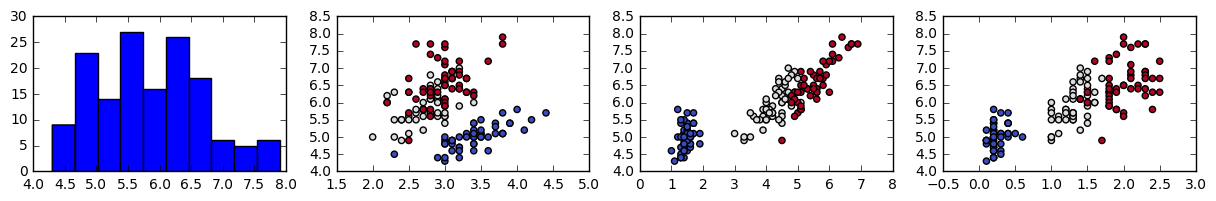

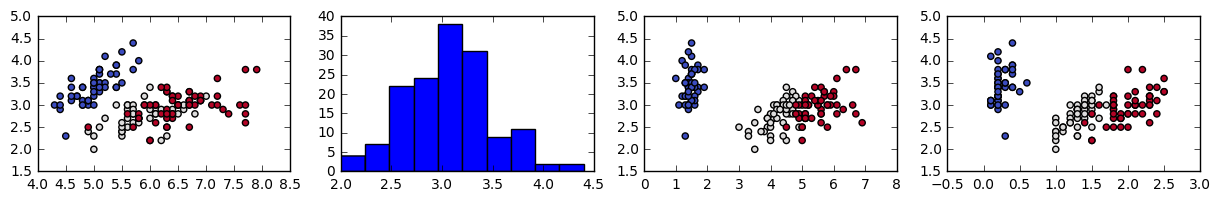

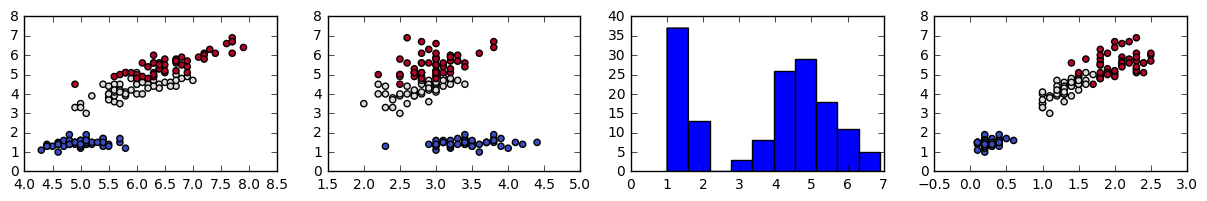

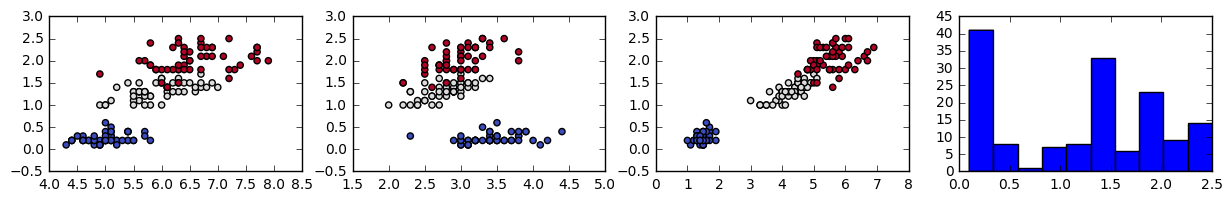

In [3]:
%matplotlib inline

from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()
X=iris
X=iris.data
Y=iris.target

columns = 4
width = 15
height = 2

for i in range (0, 4):
    for j in range (0,4):
        plt.figure(i+1, figsize=(width, height))
        p = plt.subplot(1, columns, j+1)
        if (i == j):
            p.hist(X[:, j])
        else:
            p.scatter(X[:, j], X[:, i], c=Y, cmap=plt.cm.coolwarm)

### Question: what conclusions can you come to after looking at this plot?
- e.g., which classes can be easily separated by just looking at some of these plots? Which can not?

After looking at the plots above, the class that could be easily seperated is the setosa class, which is coloured in blue in the scatter graphs. It is visible from the plots, that, you can distinguish the setosa class from the other classes just by checking if their petal length or width is below a certain treshold. Meanwhile, the other two classes (versicolor and virsinica (white and red respectively)) are harder to distinguish; as the decision would need to be based on at least two features to try and distinguish between these classes.

### Task:  Exploratory Data Analysis under noise

When data are collected under real-world settings (e.g., from webcams or other errors) they usually contain some amount of noise that makes classification more difficult.  

Try to perturb your data with some Gaussian noise, e.g. by

    `X=X+np.random.normal(0,0.5,X.shape)`
    
and then plot the data again.  Do this is the cell provided below.

### <span style="color:red">Edit  cell below with your answer</span>

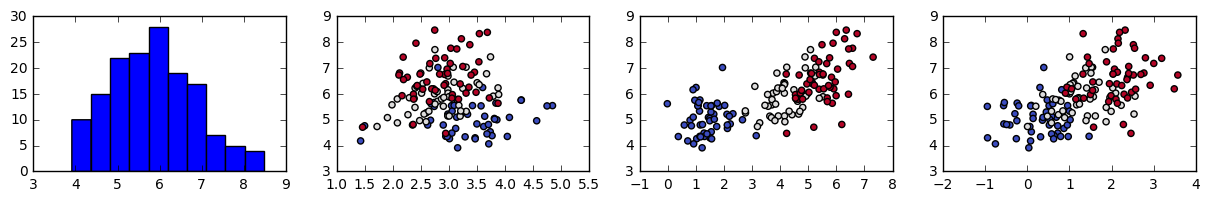

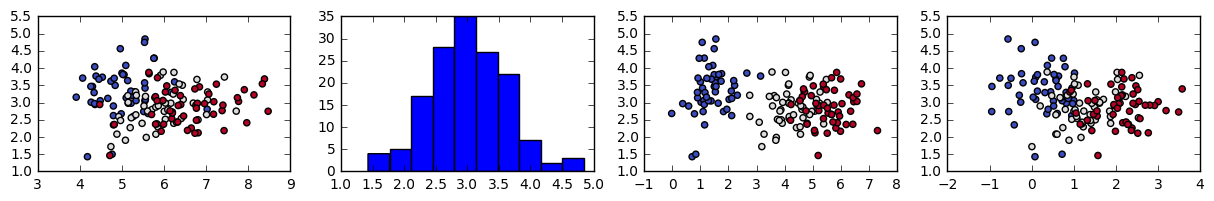

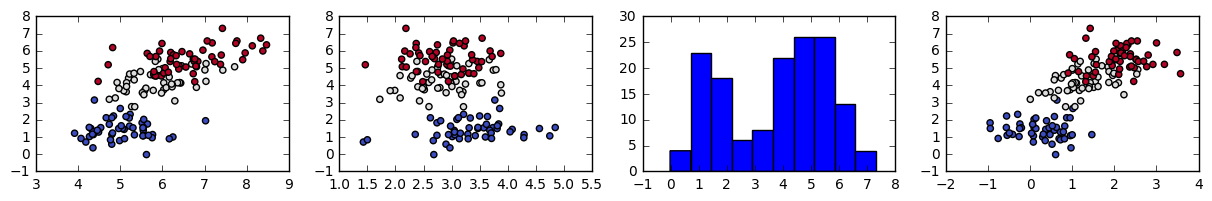

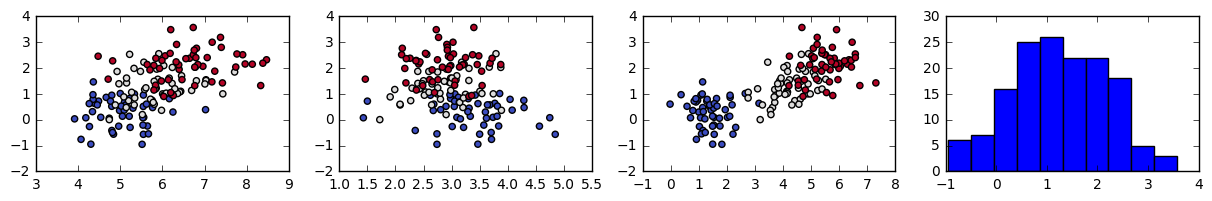

In [2]:
%matplotlib inline

from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()
X=iris
X=iris.data
Y=iris.target

X=X+np.random.normal(0,0.5,X.shape)

columns = 4
width = 15
height = 2

for i in range (0, 4):
    for j in range (0,4):
        plt.figure(i+1, figsize=(width, height))
        p = plt.subplot(1, columns, j+1)
        if (i == j):
            p.hist(X[:, j])
        else:
            p.scatter(X[:, j], X[:, i], c=Y, cmap=plt.cm.coolwarm)

###  Question.  What do you observe? What has changed with respect to the conclusion you arrived at by looking at the plots before adding noise?

What I have noticed comparing to the conclusion of the last question is that it became significantly harder to distinguish between all three classes now that all the points of all the classes are closer together. Whilst in some of the scatter graphs, it is still possible to easily distinguish the blue class, in other graphs all the three classes are rather scattered over one another which would make it harder to distinguish the classes compared to the other plots that do not have the noise added.

## 2. Implementing kNN

You have already worked with k Nearest Neighbour (kNN) classification during the labs (Labs 3-4), using sklearn's version of the classifier.  This task deals with implementing your own version of k-nearest neighbour (kNN) classification.   

kNN simply checks the distance of a test point, $x^*$ with respect to all data points in the training set $X$, finds the ''closest'' point to $x^*$ in our training data (with the smaller error), and assigns the label of the ''closest'' point to $x^*$.  This is in case we are looking at just one neighbour.  If we are looking at, say k=3 neighbours, then we need to perform some kind of majority voting to decide upon the label for $x^*$.

Here is a basic pseudocode for k-NN:
- Input: training data $X$, class labels $y$, testing data point $x^*$
- Get distance of $x^*$ to every training datum $x_i \in X$
- Select k nearest data points in training data ($x_i \in X$) to $x^*$ according to distance function
- Return $y^*$, the predicted label for $x^*$, a function of the labels of the k-nearest neighbours in the training data.  
 - e.g., if k=1 then we can just return the label of the nearest neighbour in X
 - otherwise, if k>1, a simplistic approach is to just take the majority class in the nearest neighbours
 
 
**Task:  In the cell below, implement your own version of k-NN (note: we use the parameter n to set the number of neighbours instead of k in the code)**
- Use ** at least ** two functions to measure the distance of a test point $x^*$ to a point in the training data, $x_i$
 - E.g., the euclidian distance and the l1-norm (absolute value)
- When done, print the accuracy on the testing set, as well as the confusion matrix below

*Note: one of the numpy methods you might need is `argsort`, that returns the sorted index of a 1D-array of values *

### <span style="color:red">Edit  cell below with your answer</span>

In [80]:
%matplotlib inline

from sklearn import datasets
import operator
import numpy as np
import matplotlib.pyplot as plt
import math

iris = datasets.load_iris()
X = iris.data 
Y = iris.target

                          # ---------------- function start here -------------------------------#

def split_train_test_1(X,test_size,rand_seed):
    np.random.seed(rand_seed)
    indices = np.random.permutation(X.shape[0]) # store the permuted indices
    testLen = np.floor(test_size * X.shape[0]).astype(int)
    idxTrain = indices[:-testLen] 
    idxTest = indices[-testLen:]
    assert not np.intersect1d(idxTest,idxTrain)
    assert len(idxTrain) + len(idxTest) == X.shape[0]
    return (idxTrain,idxTest) # return the indices that points to the data as two lists

def euclideanDistance(in1, in2, length):
    distance = 0
    for x in range(length):
        distance += pow((in1[x] - in2[x]), 2)
    return math.sqrt(distance)

def normDistance(in1, in2, length):
    distance = 0
    for x in range(length):
        distance += np.linalg.norm((in1[x] - in2[x]))
    return distance

def manhattanDistance(in1, in2, length):
    distance = 0
    for x in range (length):
        distance += abs(in1[x] - in2[x])
    return distance

def getNeighbours(t,X,n,T): # where T is number of data
    distances = []    
    
    # calculate the distance between each testing set row and every training set row
    # uncomment (or comment) the code below, depending on which distance function you want to use
    for i, instance in enumerate(X[:T]):
        distance = euclideanDistance(t, instance, 4)
        #distance = manhattanDistance(t, instance, 4)
        #distance = normDistance(t, instance, 4)
        distances.append((distance, i)) # append the calculated distance to the distances array
        
    distances.sort() # sort the distances array by lowest-highest
    
    neighbours = [] # create an empty neighbours array where nearest neighbours will be stored
    for i in distances[:n]:
        neighbours.append(i[1]) # append the indices of k nearest neighbours for each test row
    return neighbours # return the filled neighbours array

def assignLabel(nLabels):
    label_counts = np.bincount(nLabels) # count the number of occurences of each class
    return np.argmax(label_counts) # return the most common class (max number of occurences)

def getConfusionMatrix(predictedC, actualC):
    cf = np.zeros((3,3), dtype=np.int) # create an empty 3x3 matrix of zeros
    
    # Generate the confusion matrix
    for i,j in zip(actualC, predictedC):
            cf[i][j] += 1
    return cf # return the list

def getAccuracy(predictedC, actualC):
    correct = 0
    for (pred, actual) in zip(predictedC, actualC): # loop through predicted and actual classes  
        if (pred == actual): # check number of correct predictions based on actual class
            correct += 1
    accuracy = float(correct * 100) / len(actualC) # calculate the accuracy (num. of correctly predicted classes / length)
    return accuracy


                         # ---------------- function end here -------------------------------#

idxTrain, idxTest = split_train_test_1(X,0.2,0) # split the data into training and testing and store its indices
 
k = 3 # specify the number of nearest neighbours

Xtrain = X[idxTrain] # load the data/features of the training set
Ytrain = Y[idxTrain] # load the labels of the training sets
Xtest = X[idxTest] # load the data/features of the testing set
Ytest = Y[idxTest] # load the labels of the testing set

predictions = [] # declare an empty list where predictions will be later stored

for i, j in enumerate(Xtest): # for each data row in the test set
    neighbours = getNeighbours(j, Xtrain, k, Xtrain.shape[0]) # get the nearest neighbours and store it in a new neigbours array
    pred = assignLabel(Ytrain[neighbours]) # append the most common label based on nearest neighbours
    predictions.append(pred) # append the prediction to the predictions array

accuracy = getAccuracy(predictions, Ytest) # store the returned accuracy

print "Value of k is: " + str(k) # print the value of k
cf = getConfusionMatrix(predictions, Ytest) # store the generated confusion matrix

print "\n" + "Confusion Matrix" # print the confusion matrix
for row in (cf): print row
    
print "\n" + "Accuracy is: " + str(accuracy) # print the accuracy

Value of k is: 3

Confusion Matrix
[10  0  0]
[0 9 2]
[0 0 9]

Accuracy is: 93.3333333333


## 3. Nested Cross-validation using your implementation of KNN

The final part of this coursework links the work you 've done so far with Lab 4, where you implemented nested cross-validation.

** If you need a refresher on nested cross-validation, then read the notes on the notebook for Lab 4 (LB 04 NB05 Cross Val) again.**

In summary, nested cross validation splits the dataset into k-folds, where we have a training set, a testing set and a validation set.  We train on the training data, pick our parameters on the validation data and evaluate our model on the testing data for each fold, similary to Lab 4.

For this task, you need to **implement 5-fold nested cross-validation, evaluating the appropriate number of neighbours (n) from 1 to 10, as well as the distance function that performs the best (at least euclidian distance and the absolute value error - l1 norm)**.

Furthermore, you need to **evaluate the performance of the model (i) on the data as loaded from the iris data, and (ii) on the same data pertrubed with Gaussian noise (by adding noise when loading the dataset**, `X=X+np.random.normal(0,0.5,X.shape)` )

Finally, you need to come up with ** some way of dealing with cases where there is a tie: for example, you take two nearest neighbours (n=2) with the labels [1,2].  Which label would you choose in this case? **

If you correctly completed the coursework thus far and completed Lab 4, then essentially all you are left with is to combine code that you have already written and evaluate.

When done your code should print:
- For each fold, the accuracy on the validation set depending on parameter choice
- For each fold, accuracy/confusion matrix on testing set with parameters choosen by validation set (above)
- When done with all folds,
 - The total confusion matrix over all folds
 - The average accuracy and standard deviation of all folds (see numpy.mean and numpy.std)


### <span style="color:red">Edit  cell below with your answer</span>

In [96]:
                        # ---------------- function start here -------------------------------#

def getNeighbours2 (t,X,n,T,dist): # where T is number of data
    distances = []    
    
    # calculate the distance between each testing set row and every training set row
    # uncomment the code below depending on which distance function you want to use
    for i, instance in enumerate(X[:T]):
        distance = dist(t, instance, 4)
        #distance = manhattanDistance(t, instance, 4)
        #distance = normDistance(t, instance, 4)
        distances.append((distance, i)) # append the calculated distance to the distances array
        
    distances.sort() # sort the distances array by lowest-highest
    
    neighbours = [] # create an empty neighbours array where nearest neighbours will be stored
    for i in distances[:n]:
        neighbours.append(i[1]) # append the indices of k nearest neighbours for each test row
    return neighbours # return the filled neighbours array

def cross_val_1(dataset, k, rand_seed, add_noise):
    np.random.seed(rand_seed)
    indices = np.random.permutation(dataset.data.shape[0])  
    X = dataset.data[indices,:]
    Y = dataset.target[indices]
    
    if add_noise == True: # if variable add_noise is set to true, execute
         X = X + np.random.normal(0,0.5, X.shape) 

    num_instances = X.shape[0] # store the total number of rows
    foldLength = num_instances / k # divide to get the number of folds to do

    folds = [] # declare an empty folds array that will later be used
    
    Xtrain, Ytrain, Xtest, Ytest = [], [], [], []
    
    for i in range(k): # for the range of k (num. of folds), store the indices that will be used as part of test data
        idxTest = np.arange((i * foldLength) , (i * foldLength + foldLength))
        
        Xtest.append(X[idxTest,:]) # append the actual data of the indices
        Ytest.append(Y[idxTest]) # append the labels of the indices
        Xtrain.append(np.delete(X, idxTest, axis=0)) # append the rest of the data into a train array
        Ytrain.append(np.delete(Y, idxTest)) # append the rest of the labels into a train array
        
        folds.append((Xtrain[i], Ytrain[i], Xtest[i], Ytest[i])) #a ppend the data for each fold
    return folds

def performCV(CVfolds, numDistFunctions, minNeighbours, maxNeighbours):
    accuracies = [] # declare empty list where accuracies will later be stored
    
    for dist in numDistFunctions: # for each type of distance (default 3)
        avg_CV_accuracy = [] # declare empty list where average accuracy will be stored

        for k in range(minNeighbours, maxNeighbours + 1):
            currFoldAccuracy = [] # declare empty list to store current folds accuracy
            
            for fold in CVfolds: # for each fold, run
                # Prepare training and test set
                Xtrain, Ytrain, Xtest, Ytest = fold
                
                predictions = [] # declare empty list to store predictions

                for i, j in enumerate(Xtest): # for each test row, loop     
                    neighbours = getNeighbours2(j, Xtrain, k, Xtrain.shape[0], dist) # get the k nearest neighbours
                    pred = assignLabel(Ytrain[neighbours]) # append the label to that test row depending on most common class
                    predictions.append(pred) # append the predicted class to predictions array
   
                currFoldAccuracy.append(getAccuracy(predictions, Ytest)) # get the overall accuracy for this k and append
            accuracies.append(currFoldAccuracy) # append each accuracy 
    return accuracies

def printValues(accuracies, distance_functions, maxNeighbours):
    for i, dist in enumerate(distance_functions): 
        
        print dist.__name__ + "\n"
        for j in range(0, maxNeighbours):

            foldAccuracy = accuracies[i*j + j] # store the accuracy for each fold
            avgAccuracy = np.mean(foldAccuracy, axis=0) # store the avg. accuracy of all folds
            stdAccuracy = np.std(foldAccuracy, axis=0) # store the std. deviation of all folds
            
            print "Value of k is: " + str(j+1)
            print "Each fold's accuracy is: " + str(foldAccuracy)
            print "Avg. Accuracy is: " + str(avgAccuracy)
            print "Std. deviation is: " + str(stdAccuracy)
            print "\n"

                        # ---------------- function end here -------------------------------#

foldNum = 5 # specify the number of folds to do
maxNeighbours = 10 # specify the max num. of neighbours (range between min and max) to do folds on
distance_functions = [euclideanDistance, manhattanDistance] # append different distance names (name of functions) to use
ADD_NOISE = False # specify whether to add noise (True or False)
CVfolds = cross_val_1(iris, foldNum, 10, ADD_NOISE) # store the returned split data for each fold
accuracies = performCV(CVfolds, distance_functions, 1, maxNeighbours) # store the returned accuracies for each fold and k
printValues(accuracies, distance_functions, maxNeighbours)

euclideanDistance

Value of k is: 1
Each fold's accuracy is: [96.66666666666667, 96.66666666666667, 90.0, 96.66666666666667, 100.0]
Avg. Accuracy is: 96.0
Std. deviation is: 3.26598632371


Value of k is: 2
Each fold's accuracy is: [96.66666666666667, 96.66666666666667, 90.0, 90.0, 96.66666666666667]
Avg. Accuracy is: 94.0
Std. deviation is: 3.26598632371


Value of k is: 3
Each fold's accuracy is: [96.66666666666667, 96.66666666666667, 93.33333333333333, 96.66666666666667, 100.0]
Avg. Accuracy is: 96.6666666667
Std. deviation is: 2.10818510678


Value of k is: 4
Each fold's accuracy is: [96.66666666666667, 96.66666666666667, 93.33333333333333, 93.33333333333333, 100.0]
Avg. Accuracy is: 96.0
Std. deviation is: 2.49443825785


Value of k is: 5
Each fold's accuracy is: [96.66666666666667, 96.66666666666667, 93.33333333333333, 96.66666666666667, 96.66666666666667]
Avg. Accuracy is: 96.0
Std. deviation is: 1.33333333333


Value of k is: 6
Each fold's accuracy is: [96.66666666666667, 96.66

### Question: Writeup regarding your implementation: any implementation details, description of how you implemented nested cross-validation, description on how you implemented k-NN

# kNN implementation

Importing the data:
Since we need data to work with, I imported the iris dataset and loaded the actual data of the dataset into a variable X and the labels (the three classes) into variable Y

Splitting the data:
I created a "split_train_test_1" function that takes in the actual dataset, the test size and the random seed as a parameter. This function then splits the data based on the paramaters that are passed to the function, in which case I used 80% (120 rows) of the dataset for the training set and 20% (30 rows) for the testing set. The data is then split and the indices that points to both training and testing data from the whole dataset are stored in two individual lists that are then returned from the function.

Loading the data:
Now that the two arrays are returned, I use those indices to get the actual data and their labels and store it into four different arrays. Xtrain contains the the data for the training set, Xtest contains the data for the testing set and Ytrain & Ytest contain the labels for training and testing set respectively.

Calculating the distance:
At this point, for every row in the test set (each row has 4 columns), I calculate the distance between the four values in the test row and the four values between each training set row. Each test data row is compared and gets the distance calculated between every single training set row. Once the distance is calculated, I store each of the calculated values in an array which is then sorted in ascending order but also keeps the reference to the row from the training set that the distance belongs to.

Different types of distances:
I originally started off with just euclidean distance calculation, but added manhattan and 1-norm distance. If you want to use either then just uncomment the call to one of the distance functions in getNeighbours() function.

Getting the nearest neighbours:
Since the distances array was sorted in ascending order, the lowest distance between that test row and any row from the training set that corresponds to that distance, depending on the value set for k (nearest neighbours), the value can be gathered from an array just by using the lowest index, for example if k=1, the lowest distance will be stored in index 0. but if k=3, I will have to get the lowest three distances, rather than one (index 0, index 1 and index 2). Depending on k, the k nearest neighbours are appended to the neighbours array for that test row.

Getting the most common class:
Now that I have the k nearest neighbours stored in an array, I access the actual classes of these k nearest neighbours and do a vote on which class is the most common. The most common class between these k nearest neighbours is then assigned as the predicted class for that test row. This same process gets repeated 30 times (since the test data was split into 30 out of 150 rows) and in the end, each test row will end up having a predicted class based on k nearest neighbours.

Calculating the accuracy and printing the confusion matrix:
Now that all the predicted classes for each test row are stored in a predictions array, I pass that and the actual testing dataset labels to compare how well the algorithm performed in general. For accuracy, I check to see how many of the predictions made are actually the same as the actual classes for each test dataset row (by increasing the correct variable) and then use that to calculate the accuracy of the model for any k specified. The confusion matrix is done in a similar fashion, but I am actually setting which classes were predicted and how it compares to the actual classes in a 3x3 matrix (num. of predicted classes at the top and num. of actual classes on the left-hand side). This allows to see which classes were predicted incorrectly and how many times.

# cross-validation implementation

Splitting the data:
Split the data into training and validation sets that will be used for each fold (30 each out of 150 total) because there will be 5 folds performed for each value of k.

Performing cross-validation:
Now that the data is split for different folds, I use the data for every value of k between 1 and 10 and each value of k performs 5 folds with the different data that I loaded earlier for each fold.

Calculating the avg. accuracy & deviation:
Since there were 5 folds performed for each value of k, I get these accuracy values (5 values due to 5 folds) for each k and average that to get the average accuracy and the standard deviation for that k. This average can then be used to find the best k (nearest neighbour) parameter.

### Question: Paste the total confusion matrices and average accuracy/standard deviation over all folds for the clean data and noisy data case in the cell below.  Which are your conclusions?  

### no noisy data

euclideanDistance

Value of k is: 1
Avg. Accuracy is: 96.0
Std. deviation is: 3.26598632371

Value of k is: 2
Avg. Accuracy is: 94.0
Std. deviation is: 3.26598632371

Value of k is: 3
Avg. Accuracy is: 96.6666666667
Std. deviation is: 2.10818510678

Value of k is: 4
Avg. Accuracy is: 96.0
Std. deviation is: 2.49443825785

Value of k is: 5
Avg. Accuracy is: 96.0
Std. deviation is: 1.33333333333

Value of k is: 6
Avg. Accuracy is: 95.3333333333
Std. deviation is: 1.63299316186

Value of k is: 7
Avg. Accuracy is: 96.0
Std. deviation is: 2.49443825785

Value of k is: 8
Avg. Accuracy is: 96.0
Std. deviation is: 2.49443825785

Value of k is: 9
Avg. Accuracy is: 96.6666666667
Std. deviation is: 2.98142397

Value of k is: 10
Avg. Accuracy is: 96.0
Std. deviation is: 2.49443825785


manhattanDistance

Value of k is: 1
Avg. Accuracy is: 96.0
Std. deviation is: 3.26598632371

Value of k is: 2
Avg. Accuracy is: 96.6666666667
Std. deviation is: 2.10818510678

Value of k is: 3
Avg. Accuracy is: 96.0
Std. deviation is: 1.33333333333

Value of k is: 4
Avg. Accuracy is: 96.0
Std. deviation is: 2.49443825785

Value of k is: 5
Avg. Accuracy is: 96.6666666667
Std. deviation is: 2.98142397

Value of k is: 6
Avg. Accuracy is: 95.3333333333
Std. deviation is: 3.3993463424

Value of k is: 7
Avg. Accuracy is: 96.6666666667
Std. deviation is: 2.10818510678

Value of k is: 8
Avg. Accuracy is: 94.6666666667
Std. deviation is: 1.63299316186

Value of k is: 9
Avg. Accuracy is: 94.6666666667
Std. deviation is: 1.63299316186

Value of k is: 10
Avg. Accuracy is: 94.0
Std. deviation is: 1.33333333333

### noisy data

euclideanDistance

Value of k is: 1
Avg. Accuracy is: 84.0
Std. deviation is: 3.26598632371

Value of k is: 2
Avg. Accuracy is: 80.0
Std. deviation is: 6.9920589878

Value of k is: 3
Avg. Accuracy is: 83.3333333333
Std. deviation is: 4.71404520791

Value of k is: 4
Avg. Accuracy is: 84.6666666667
Std. deviation is: 3.3993463424

Value of k is: 5
Avg. Accuracy is: 82.6666666667
Std. deviation is: 3.26598632371

Value of k is: 6
Avg. Accuracy is: 82.6666666667
Std. deviation is: 2.49443825785

Value of k is: 7
Avg. Accuracy is: 85.3333333333
Std. deviation is: 6.18241233033

Value of k is: 8
Avg. Accuracy is: 84.0
Std. deviation is: 5.73488351136

Value of k is: 9
Avg. Accuracy is: 86.0
Std. deviation is: 7.71722460186

Value of k is: 10
Avg. Accuracy is: 85.3333333333
Std. deviation is: 6.18241233033


manhattanDistance

Value of k is: 1
Avg. Accuracy is: 84.0
Std. deviation is: 3.26598632371

Value of k is: 2
Avg. Accuracy is: 83.3333333333
Std. deviation is: 4.71404520791

Value of k is: 3
Avg. Accuracy is: 82.6666666667
Std. deviation is: 3.26598632371

Value of k is: 4
Avg. Accuracy is: 85.3333333333
Std. deviation is: 6.18241233033

Value of k is: 5
Avg. Accuracy is: 86.0
Std. deviation is: 7.71722460186

Value of k is: 6
Avg. Accuracy is: 86.0
Std. deviation is: 2.49443825785

Value of k is: 7
Avg. Accuracy is: 85.3333333333
Std. deviation is: 5.41602560309

Value of k is: 8
Avg. Accuracy is: 81.3333333333
Std. deviation is: 5.81186525805

Value of k is: 9
Avg. Accuracy is: 82.6666666667
Std. deviation is: 6.79869268479

Value of k is: 10
Avg. Accuracy is: 84.6666666667
Std. deviation is: 6.18241233033

### Conclusion

Based on the folds, I can see that the average accuracy is generally lower when noisy data is used. When using no noisy data, there is no average accuracy that drops below 94%, meanwhile the highest average accuracy whilst using noisy data only reaches 86%. The standard deviation is also generally higher when using noisy data compared to using non-noisy data, which means that there is a higher spread of numbers.

### Question: Paste the best neighbour parameters selected for cross-validation over all folds in the cell below, along with the respective validation accuracy per fold
-  How does this change over all folds? Can you say that one parameter selection is better regardless of data?  
-  Does the best parameter choice change depending on whether we use clean or noisy data?

### <span style="color:red">Edit this cell with your answer</span>

### Question: Which distance functions did you use?  Did you notice any changes between using noisy and clean data regarding choice of distance function?  Use the resulting total confusion matrices / total accuracy to justify any conclusions.

### <span style="color:red">Edit this cell with your answer</span>

### Question: What happens in case of a tie? 
- E.g., you select n=2 (two nearest neighbours), with labels [1,2].  Which label would you pick?

In case of a tie, there are different kinds of options to choose from. Since we would ideally want n to be an odd number (so there are no ties), a good way to resolve a tie would be to decrease or increase k by one until a tie is broken and a most common class (label) can be selected without a tie. Another example of how to break a tie is to simply pick a random label out of the given actual labels and use that as the prediction

### Question:  Assume you were to implement a variant of k-NN that weighs each nearest neighbour by some value before deciding upon the label to assign.  Can you think of possible ways to assign a weight on each neighbour?

### <span style="color:red">Edit this cell with your answer</span>